In [1]:
import matplotlib.pyplot as plt
import polars as pl
import util
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import osmnx as ox
import numpy as np

In [2]:
df = util.load_data().fetch(500_000)

In [3]:
train, test = train_test_split(df, test_size=0.2)
train, valid = train_test_split(train, test_size=0.2)

In [4]:
def print_point_on_map(ax, x, y, points_area, image_size, image, markersize=.5, color='b', title=None):
    x_min, x_max, y_min, y_max = points_area
    
    x_printable = image_size[0] * (x - x_min) / (x_max - x_min)
    y_printable = image_size[1] * (y - y_min) / (y_max - y_min)
    
    ax.imshow(image, extent=[0, image_size[0], 0, image_size[1]])
    ax.scatter(x_printable, y_printable, markersize, color)
    if title is not None:
        ax.title.set_text(str(title))

In [5]:
x = train['pickup_longitude'].append(train['dropoff_longitude'])
y = train['pickup_latitude'].append(train['dropoff_latitude'])
points_area = x.min(), x.max(), y.min(), y.max()
image_size = (434,300)
image = util.get_image_from_coordinate(points_area, image_size)



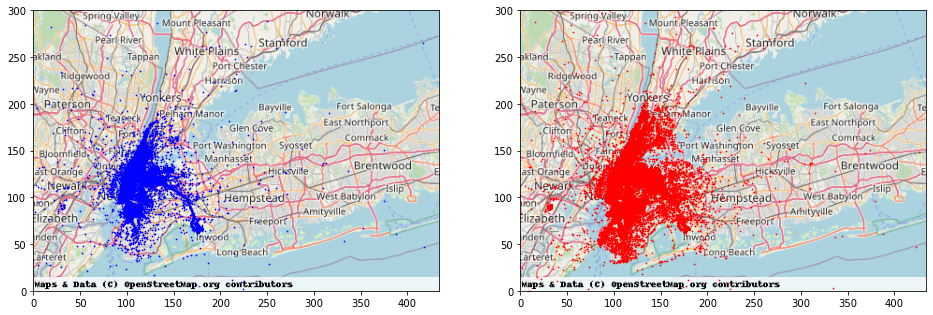

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
print_point_on_map(axs[0], train['pickup_longitude'], train['pickup_latitude'], points_area, image_size, image, color='b')
print_point_on_map(axs[1], train['dropoff_longitude'], train['dropoff_latitude'], points_area, image_size, image, color='r')

99844 220156


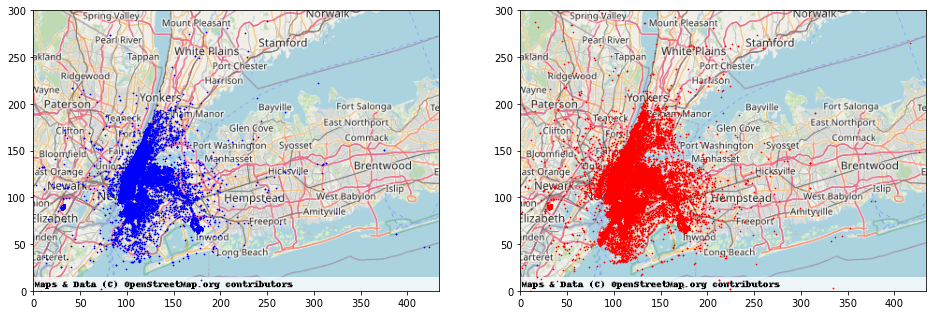

In [7]:
timezone = -5
lavorative_hours = (8, 18)

day_hours = train.filter((pl.col("pickup_datetime").dt.hour() > lavorative_hours[0]+timezone) & (pl.col("pickup_datetime").dt.hour() < lavorative_hours[1]+timezone))
night_hours = train.filter((pl.col("pickup_datetime").dt.hour() <= lavorative_hours[0]+timezone) | (pl.col("pickup_datetime").dt.hour() >= lavorative_hours[1]+timezone))

print(len(day_hours), len(night_hours))

x_day = day_hours['pickup_longitude'].append(day_hours['dropoff_longitude'])
y_day = day_hours['pickup_latitude'].append(day_hours['dropoff_latitude'])

x_night = night_hours['pickup_longitude'].append(night_hours['dropoff_longitude'])
y_night = night_hours['pickup_latitude'].append(night_hours['dropoff_latitude'])

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
print_point_on_map(axs[0], x_day, y_day, points_area, image_size, image, color='b')
print_point_on_map(axs[1], x_night, y_night, points_area, image_size, image, color='r')

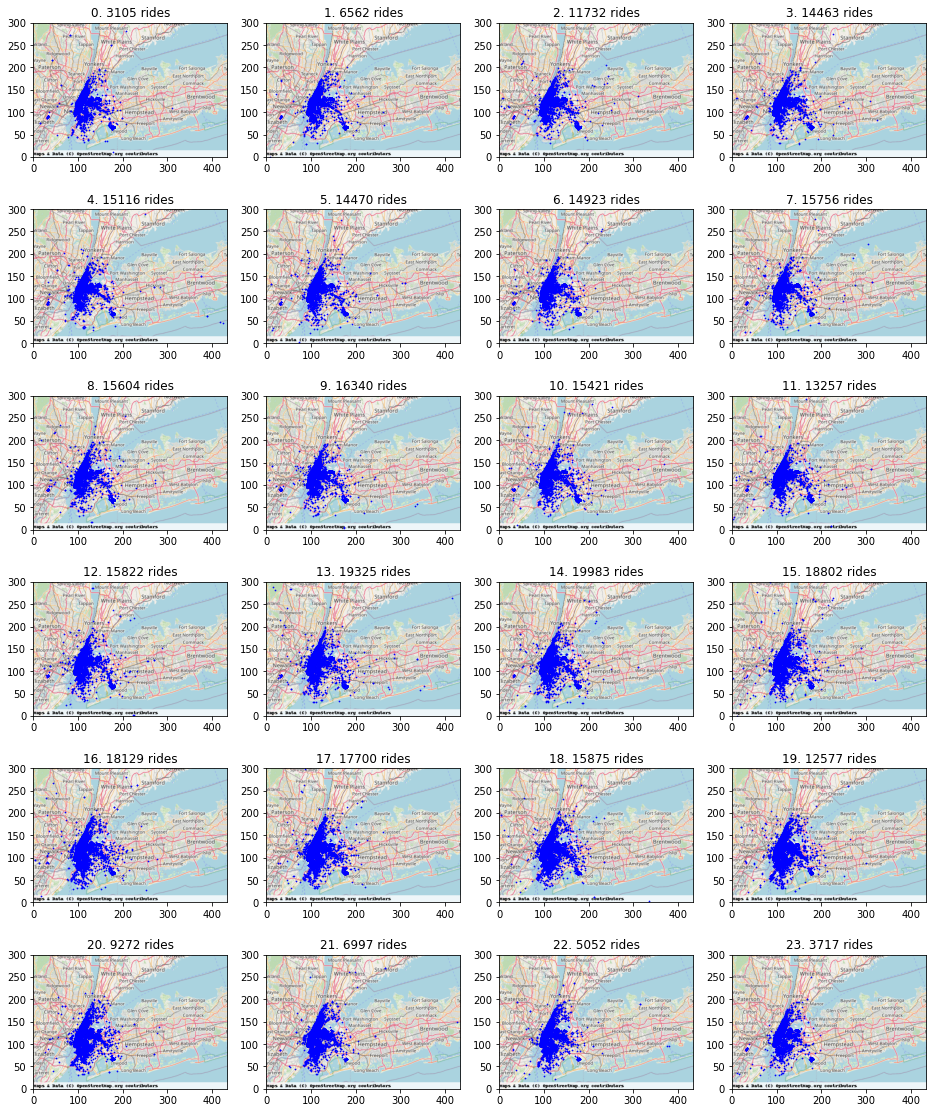

In [8]:
hours = []

for h in range(5,29):
    df = train.filter(pl.col("pickup_datetime").dt.hour() == h % 24)
    hours.append((df['pickup_longitude'].append(df['dropoff_longitude']),
                  df['pickup_latitude'].append(df['dropoff_latitude']),
                  len(df)))
    
fig, axs = plt.subplots(6, 4, figsize=(16, 20))
for h in range(24):
    print_point_on_map(axs[h//4, h % 4], hours[h][0], hours[h][1], points_area, image_size, image, color='b',
                       title=f'{(h) % 24}. {hours[h][2]} rides')

In [9]:
import importlib
importlib.reload(util)

<module 'util' from 'C:\\Users\\miky_\\progetti\\TaxiFarePrediction\\util.py'>